## Penjelasan Dataset yang digunakan

In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

In [ ]:
# 1. Kasus yang diambil

# Kasus yang digunakan adalah klasifikasi pesan SMS menjadi dua kategori:
# ham → pesan normal
# spam → pesan penipuan / promosi

In [ ]:
# 2. Penjelasan setiap kolomnya

# Dataset memiliki kolom:
# label = Label kategori (ham/spam)
# text = Isi pesan SMS
# clean_text = Hasil preprocessing

In [37]:
# 3. Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    ConfusionMatrixDisplay, accuracy_score,
    f1_score, precision_score, recall_score
)

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from tensorflow import keras
from tensorflow.keras import layers

import re
import os

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

print("Libraries imported ✓")


Libraries imported ✓


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\faisa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\faisa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\faisa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faisa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# 4. Load data

df = pd.read_csv(
    r'C:\Users\ASYS\Dokumen\ganang\dataset\spam.csv',
    encoding='latin-1'
)

df = df.loc[:, ['v1', 'v2']]
df.columns = ['label', 'text']
print(df.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


## Data Understanding

In [ ]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

In [39]:
# 1. Jumlah baris data
print("Jumlah baris data:", df.shape[0])

Jumlah baris data: 5572


In [40]:
# 2. Panjang rata-rata setiap baris
df['text_len'] = df['text'].astype(str).apply(len)
print("Panjang rata-rata pesan:", df['text_len'].mean())

Panjang rata-rata pesan: 80.11880832735105


In [41]:
# 3. Cek data duplikasi
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 403


In [42]:
# 4. Cek data kosong
print("Jumlah nilai kosong:\n", df.isnull().sum())

Jumlah nilai kosong:
 label       0
text        0
text_len    0
dtype: int64


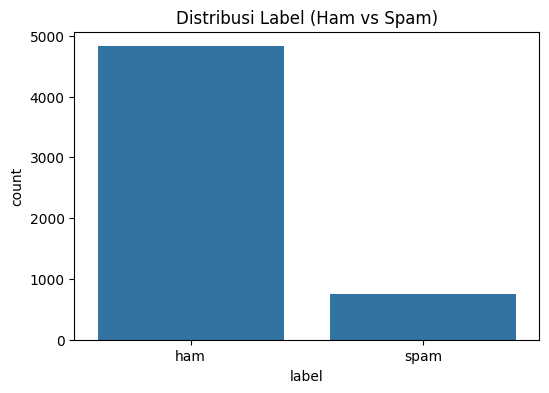

In [ ]:
# 5. Distribusi data + bar chart
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label')
plt.title("Distribusi Label (Ham vs Spam)")
plt.show()

In [44]:
# Word Cloud
from collections import Counter

all_words = ' '.join(df['text'].astype(str)).lower().split()
cnt = Counter(all_words)

top20 = cnt.most_common(20)
top20_df = pd.DataFrame(top20, columns=['word','count'])
print(top20_df)

    word  count
0     to   2226
1      i   2208
2    you   1917
3      a   1419
4    the   1317
5      u    991
6    and    967
7     is    862
8     in    855
9     my    751
10   for    697
11  your    676
12    of    613
13    me    605
14  have    568
15  call    557
16    on    520
17   are    485
18  that    468
19    it    465


## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan
# catatan (lakukan tahap 1- 5 apabila diperlukan, jika tidak langsung ke bagian 6-9)

In [45]:
# 1. Tokenisasi
tokens_example = word_tokenize(df['text'][0].lower())
print(tokens_example)

['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']


In [46]:
# 2. Lemmatization
lemmatizer = WordNetLemmatizer()
print([lemmatizer.lemmatize(word) for word in tokens_example])

['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']


In [ ]:
# 3. Stemming (tidak digunakan)
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# print([stemmer.stem(word) for word in tokens_example])

In [47]:
# 4. Stopword removal (Tanda baca, angka dan kata)
stop_words = set(stopwords.words('english'))
print("Jumlah stopword:", len(stop_words))

Jumlah stopword: 198


In [48]:
# 5. Text Normalisasi
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    tokens = word_tokenize(text)
    tokens = [
        lemmatizer.lemmatize(t)
        for t in tokens
        if t not in stop_words and len(t) > 1
    ]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess_text)
print(df[['text','clean_text']].head())

                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          clean_text  
0  go jurong point crazy available bugis great wo...  
1                              ok lar joking wif oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                      dun say early hor already say  
4                nah think go usf life around though  


In [ ]:
# 6. Matrix correlation (opsional)


In [49]:
# 7. Labeling data (Lexicon, Bert, atau polarity)
y = df['label'].map({'ham':0, 'spam':1})

In [50]:
# 8. Text Vektorisasi
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
print(X.shape)

(5572, 5000)


In [51]:
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.15,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)


X_train: (4736, 5000)
X_test : (836, 5000)


## Data Modeling

In [ ]:
# Berikan Penjelasan tentang model yang dipilih (baik machine learning maupun deep learning)
# Disarankan menggunakan deep learning.

In [ ]:
# Dalam proyek ini, model yang dipilih adalah Artificial Neural Network (ANN) atau Deep Neural Network (DNN).
# Model ini dipilih karena memiliki kemampuan untuk:
# 1.Mempelajari pola kompleks pada data
# 2.Melakukan generalisasi dengan baik
# 3.Cocok digunakan untuk dataset numerik dan klasifikasi/regresi
# 4.Mampu menangani data berskala besar

# Pada ANN, data diproses melalui beberapa lapisan (input layer, hidden layer, dan output layer).
# Semakin banyak lapisan, semakin dalam model dan semakin baik dalam menangkap pola non-linear.
# Alasan memilih deep learning:
# 1.Akurasi lebih tinggi pada data yang kompleks
# 2.Mudah dikembangkan dengan menambah jumlah layer
# 3,Mendukung banyak jenis optimasi seperti Adam, SGD, RMSprop
# 4.Performanya stabil untuk data numerik seperti data keuangan atau prediksi
# Dalam template ini, digunakan model DNN dengan 3 hidden layers, activation ReLU, dan optimasi Adam.

In [52]:
# Deep learning.
input_dim = X_train.shape[1]

model = keras.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

history = model.fit(
    X_train_dense, y_train,
    epochs=6,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

y_pred_nn = (model.predict(X_test_dense) > 0.5).astype(int).reshape(-1)


Epoch 1/6
67/67 [==============================] - 2s 17ms/step - loss: 0.4149 - accuracy: 0.8616 - val_loss: 0.2061 - val_accuracy: 0.8502
Epoch 2/6
67/67 [==============================] - 1s 17ms/step - loss: 0.1209 - accuracy: 0.9517 - val_loss: 0.0699 - val_accuracy: 0.9810
Epoch 3/6
67/67 [==============================] - 1s 12ms/step - loss: 0.0347 - accuracy: 0.9913 - val_loss: 0.0468 - val_accuracy: 0.9873
Epoch 4/6
67/67 [==============================] - 1s 18ms/step - loss: 0.0169 - accuracy: 0.9941 - val_loss: 0.0453 - val_accuracy: 0.9916
Epoch 5/6
67/67 [==============================] - 1s 15ms/step - loss: 0.0088 - accuracy: 0.9984 - val_loss: 0.0485 - val_accuracy: 0.9916
Epoch 6/6
27/27 [==============================] - 0s 3ms/step


## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

In [53]:
# 1. Confussion Matrix 
def eval_cm(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['ham','spam'])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

In [54]:
# 2. Laporann Klasifikasi (Classification report)
def eval_report(y_true, y_pred, model_name):
    print("\n=== Classification Report:", model_name, "===")
    print(classification_report(y_true, y_pred, digits=4))

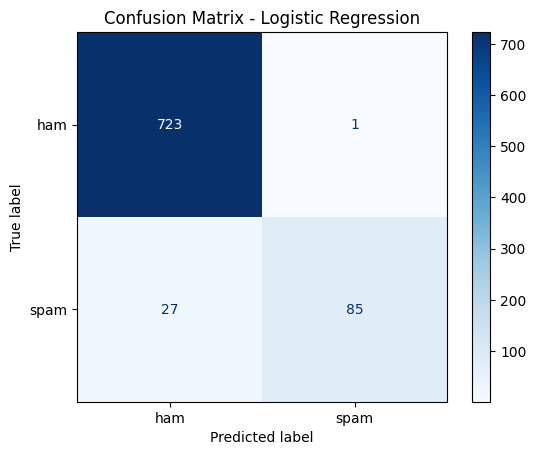


=== Classification Report: Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9640    0.9986    0.9810       724
           1     0.9884    0.7589    0.8586       112

    accuracy                         0.9665       836
   macro avg     0.9762    0.8788    0.9198       836
weighted avg     0.9673    0.9665    0.9646       836



In [56]:
eval_cm(y_test, y_pred_lr, "Logistic Regression")
eval_report(y_test, y_pred_lr, "Logistic Regression")

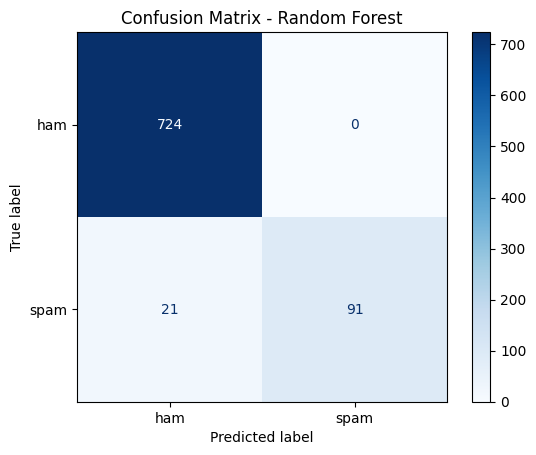


=== Classification Report: Random Forest ===
              precision    recall  f1-score   support

           0     0.9718    1.0000    0.9857       724
           1     1.0000    0.8125    0.8966       112

    accuracy                         0.9749       836
   macro avg     0.9859    0.9062    0.9411       836
weighted avg     0.9756    0.9749    0.9738       836



In [57]:
eval_cm(y_test, y_pred_rf, "Random Forest")
eval_report(y_test, y_pred_rf, "Random Forest")

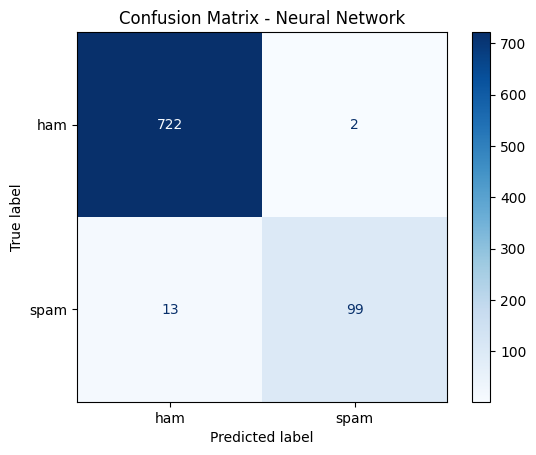


=== Classification Report: Neural Network ===
              precision    recall  f1-score   support

           0     0.9823    0.9972    0.9897       724
           1     0.9802    0.8839    0.9296       112

    accuracy                         0.9821       836
   macro avg     0.9813    0.9406    0.9596       836
weighted avg     0.9820    0.9821    0.9817       836



In [58]:
eval_cm(y_test, y_pred_nn, "Neural Network")
eval_report(y_test, y_pred_nn, "Neural Network")

## Perbandingan Model apabila menggunakan beberapa algoritma

In [ ]:
# Gunakan line chart atau barchart untuk perbandingannya

                     accuracy        f1  precision    recall
model                                                       
Logistic Regression  0.966507  0.858586   0.988372  0.758929
Random Forest        0.974880  0.896552   1.000000  0.812500
Neural Network       0.982057  0.929577   0.980198  0.883929


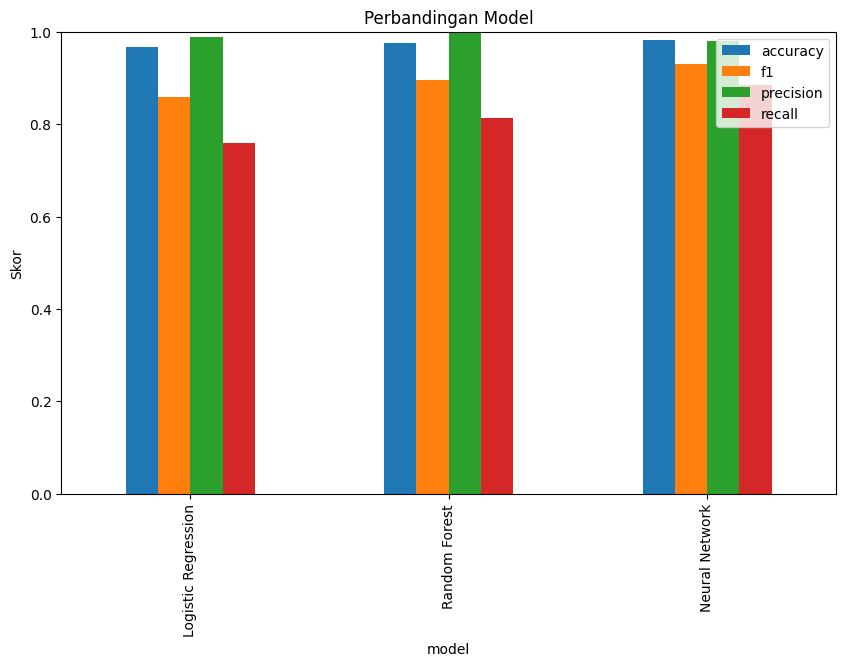

In [60]:
# Banchart
results = []

for name, pred in [
    ("Logistic Regression", y_pred_lr),
    ("Random Forest", y_pred_rf),
    ("Neural Network", y_pred_nn)
]:
    results.append({
        "model": name,
        "accuracy": accuracy_score(y_test, pred),
        "f1": f1_score(y_test, pred),
        "precision": precision_score(y_test, pred),
        "recall": recall_score(y_test, pred)
    })

res_df = pd.DataFrame(results).set_index("model")
print(res_df)

res_df.plot(kind='bar', figsize=(10,6))
plt.title("Perbandingan Model")
plt.ylabel("Skor")
plt.ylim(0,1)
plt.show()
